# Temperature Forecast Project using ML

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. 

The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables.

There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Importing Data

In [1]:
import pandas as pd
temperature=pd.read_csv("temperature.csv") #reading temperature.csv file
temperature.head() #Looking into top 5 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [2]:
temperature.shape #Checking the shape of our data

(7752, 25)

In [3]:
temperature.dtypes #Checking the datatype of each attribute

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Exploratory Data Analysis

# Handling Null Values

<AxesSubplot:>

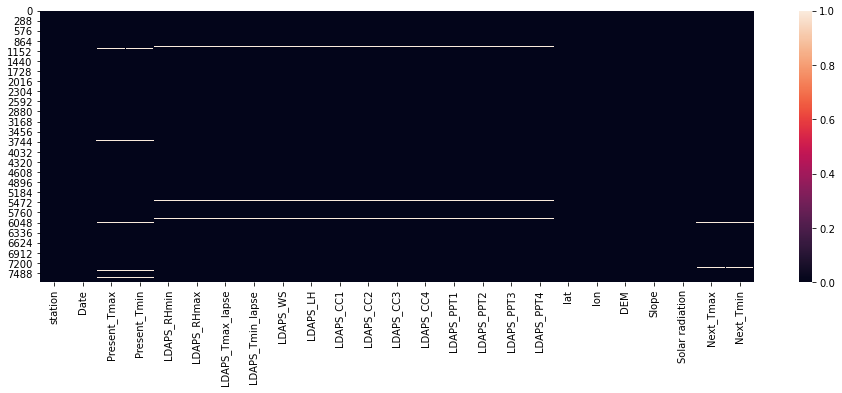

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16,5))
sns.heatmap(temperature.isnull()) #Looking for null values if any, in heatmap

In [5]:
print(temperature.isnull().sum(axis = 0))

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
temperature[temperature.isna().any(axis=1)]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
225       1.0  09-07-2013           NaN           NaN    70.051193   
271      22.0  10-07-2013           NaN           NaN    72.196007   
300       1.0  12-07-2013           NaN           NaN    95.027298   
450       1.0  18-07-2013           NaN           NaN    60.891193   
464      15.0  18-07-2013           NaN           NaN    52.795406   
627       3.0  25-07-2013           NaN           NaN    43.809799   
831       7.0  02-08-2013          29.6          25.8    76.202255   
856       7.0  03-08-2013           NaN           NaN    69.476059   
881       7.0  04-08-2013           NaN           NaN    75.457825   
913      14.0  05-08-2013           NaN           NaN    76.040504   
945      21.0  06-08-2013           NaN           NaN    50.554668   
975       1.0  08-08-2013           NaN           NaN    74.491829   
1025      1.0  10-08-2013          27.1          24.5          NaN   
1026      2.0  10-08-2013          29.7          25.4          NaN   
1027      3.0  10-08-2013          29.1          25.9          NaN   
1028      4.0  10-08-2013          30.8          27.3          NaN   
1029      5.0  10-08-2013          29.7          25.7          NaN   
1030      6.0  10-08-2013          29.6          26.4          NaN   
1031      7.0  10-08-2013          29.5          26.8          NaN   
1032      8.0  10-08-2013          29.4          25.6          NaN   
1033      9.0  10-08-2013          28.6          25.5          NaN   
1034     10.0  10-08-2013          29.0          24.2          NaN   
1035     11.0  10-08-2013          30.0          25.6          NaN   
1036     12.0  10-08-2013          29.3          25.9          NaN   
1037     13.0  10-08-2013          29.8          26.4          NaN   
1038     14.0  10-08-2013          29.4          25.4          NaN   
1039     15.0  10-08-2013          28.6          26.2          NaN   
1040     16.0  10-08-2013          28.7          24.5          NaN   
1041     17.0  10-08-2013          29.1          24.5          NaN   
1042     18.0  10-08-2013          30.4          26.2          NaN   
1043     19.0  10-08-2013          29.4          25.3          NaN   
1044     20.0  10-08-2013          29.7          25.7          NaN   
1045     21.0  10-08-2013          28.8          25.9          NaN   
1046     22.0  10-08-2013          29.7          24.9          NaN   
1047     23.0  10-08-2013          29.8          26.7          NaN   
1048     24.0  10-08-2013          30.2          26.7          NaN   
1049     25.0  10-08-2013          30.1          26.4          NaN   
1073     24.0  11-08-2013          34.2          25.1    50.618851   
1098     24.0  12-08-2013           NaN           NaN    42.087196   
1123     24.0  13-08-2013           NaN           NaN    46.577568   
2465     16.0  05-08-2014          28.8          23.1    71.442566   
2490     16.0  06-08-2014           NaN           NaN    46.952309   
2918     19.0  23-08-2014           NaN           NaN    43.267277   
3383      9.0  11-07-2015           NaN           NaN    83.332008   
3696     22.0  23-07-2015          30.4          23.4    81.568771   
3714     15.0  24-07-2015          24.6          22.4    83.265244   
3718     19.0  24-07-2015           NaN           NaN    85.127113   
3721     22.0  24-07-2015           NaN           NaN    84.758102   
3739     15.0  25-07-2015           NaN           NaN    68.156593   
3764     15.0  26-07-2015           NaN           NaN    53.755775   
3886     12.0  31-07-2015           NaN           NaN    64.559479   
3911     12.0  01-08-2015           NaN           NaN    67.209633   
4061     12.0  07-08-2015           NaN           NaN    78.795006   
4205      6.0  13-08-2015          30.8          23.9    35.218002   
4208      9.0  13-08-2015           NaN           NaN    44.970505   
4220     21.0  13-08-2015           NaN           NaN    36.299187   
4230      6.0  1

In [7]:
#Dropping null values
temperature = temperature.dropna()

<AxesSubplot:>

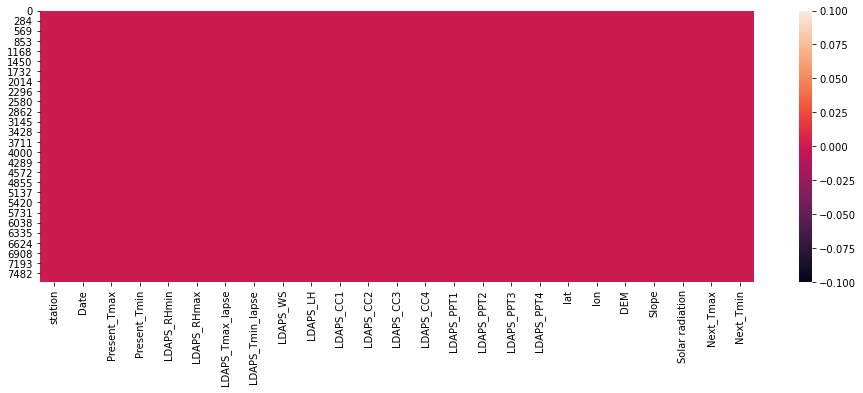

In [8]:
plt.figure(figsize = (16,5))
sns.heatmap(temperature.isnull()) #Looking for null values if any, in heatmap

In [9]:
temperature.shape #Checking the shape of our data

(7588, 25)

# Univariate Analysis

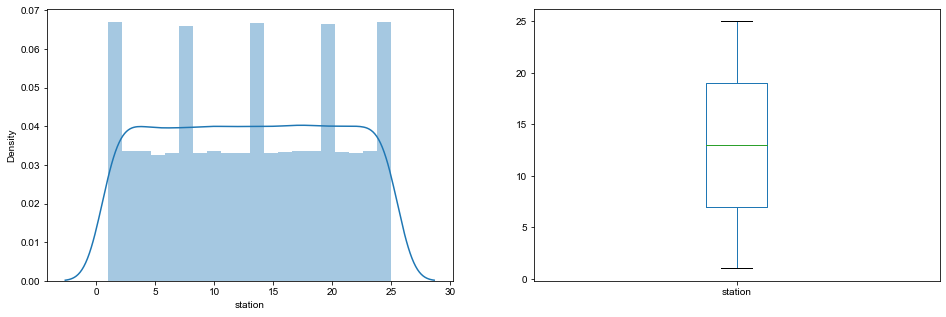

<Figure size 1152x360 with 0 Axes>

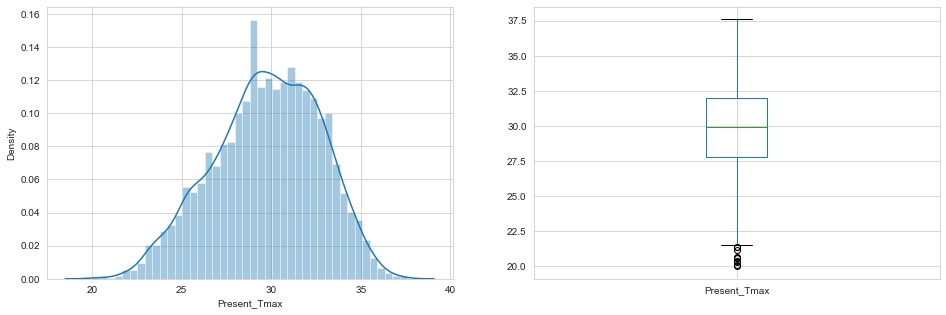

<Figure size 1152x360 with 0 Axes>

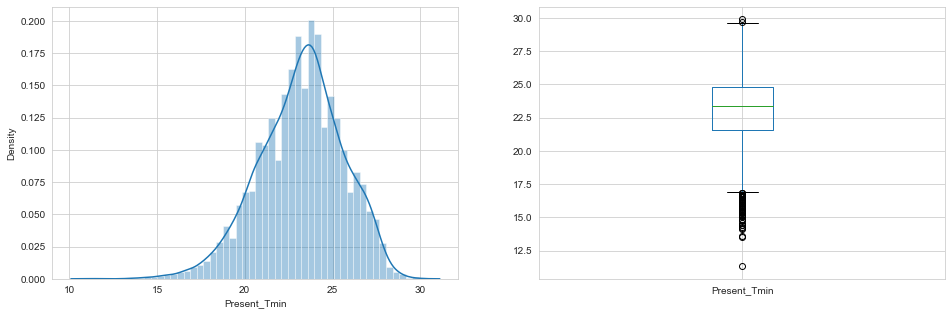

<Figure size 1152x360 with 0 Axes>

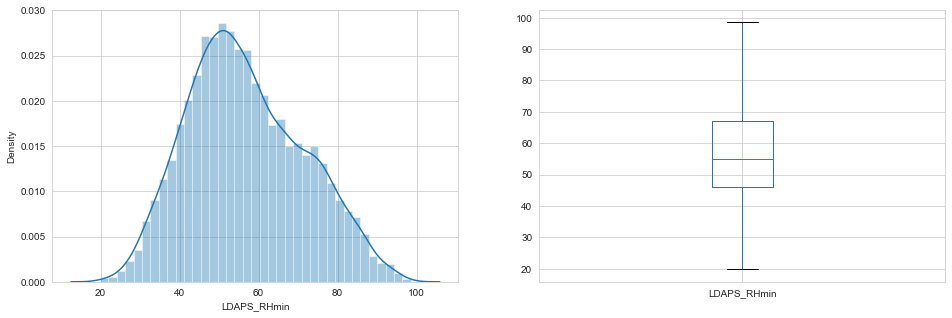

<Figure size 1152x360 with 0 Axes>

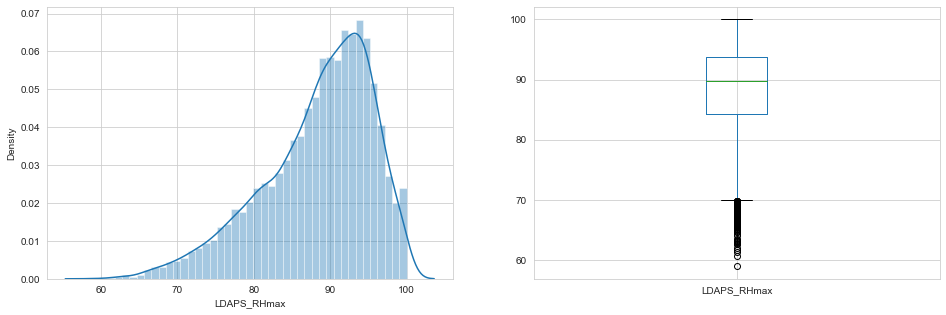

<Figure size 1152x360 with 0 Axes>

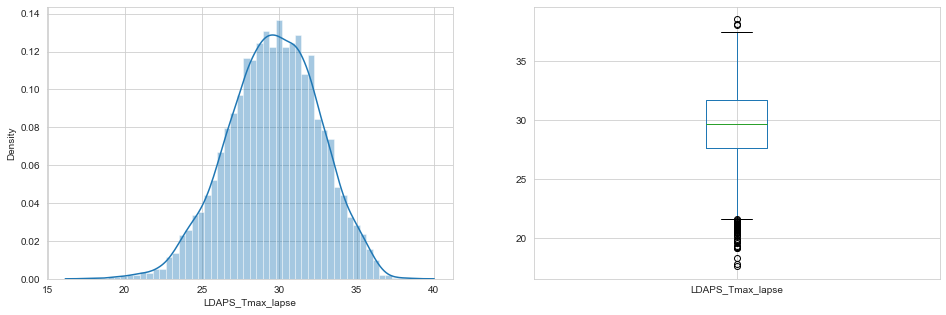

<Figure size 1152x360 with 0 Axes>

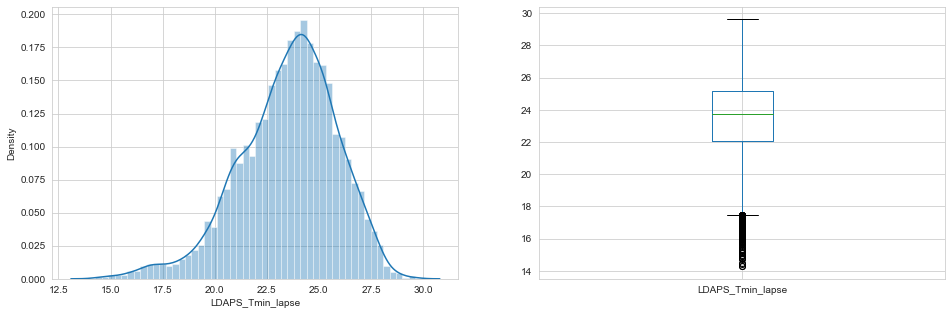

<Figure size 1152x360 with 0 Axes>

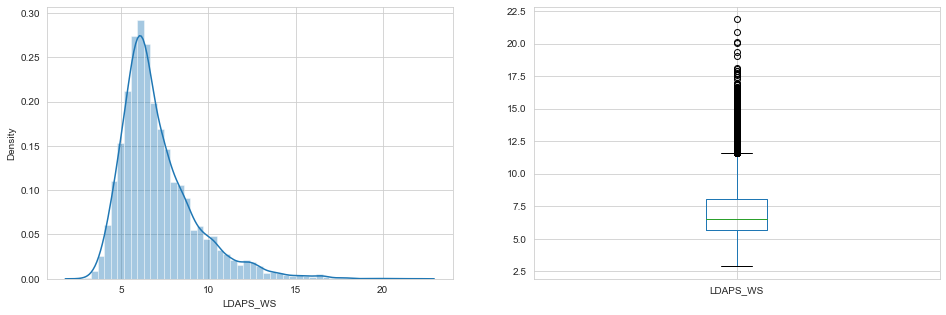

<Figure size 1152x360 with 0 Axes>

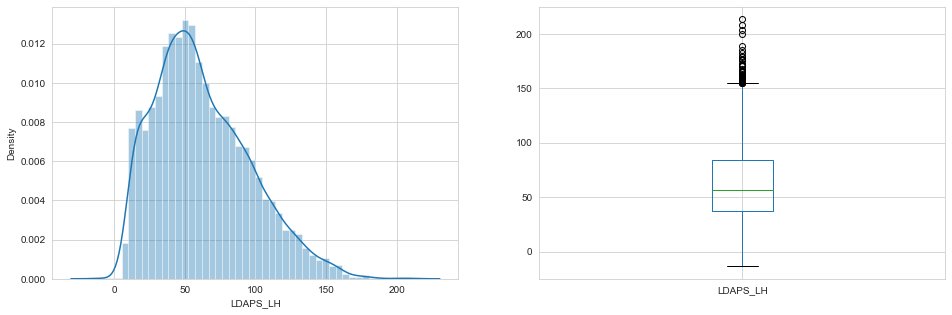

<Figure size 1152x360 with 0 Axes>

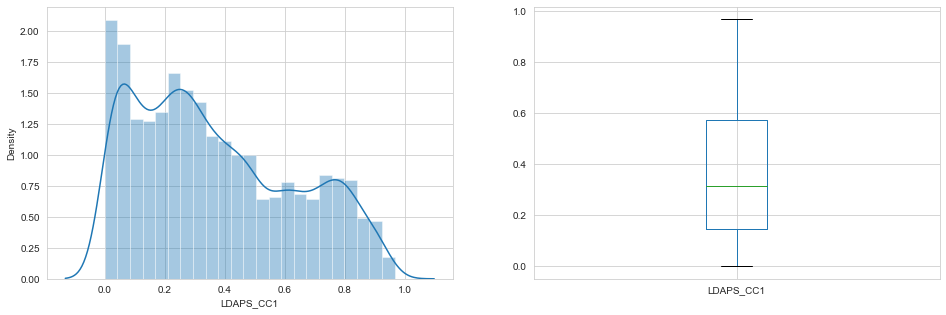

<Figure size 1152x360 with 0 Axes>

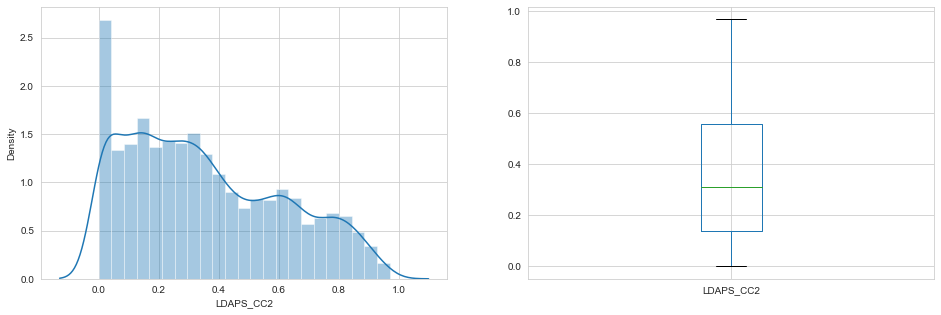

<Figure size 1152x360 with 0 Axes>

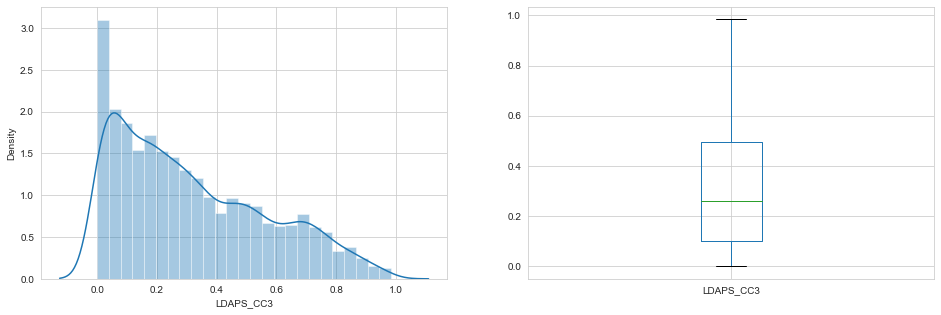

<Figure size 1152x360 with 0 Axes>

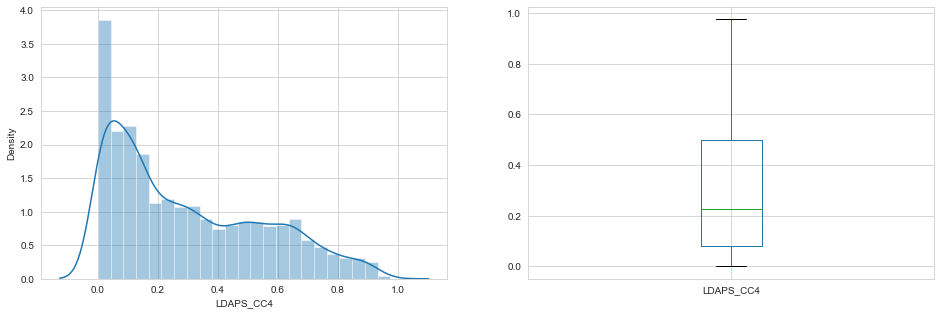

<Figure size 1152x360 with 0 Axes>

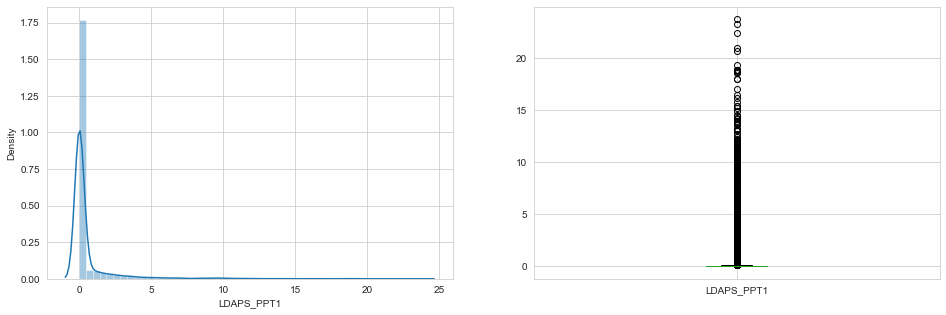

<Figure size 1152x360 with 0 Axes>

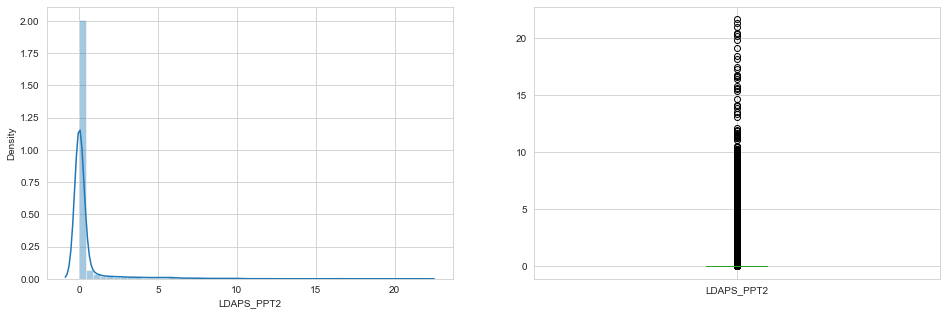

<Figure size 1152x360 with 0 Axes>

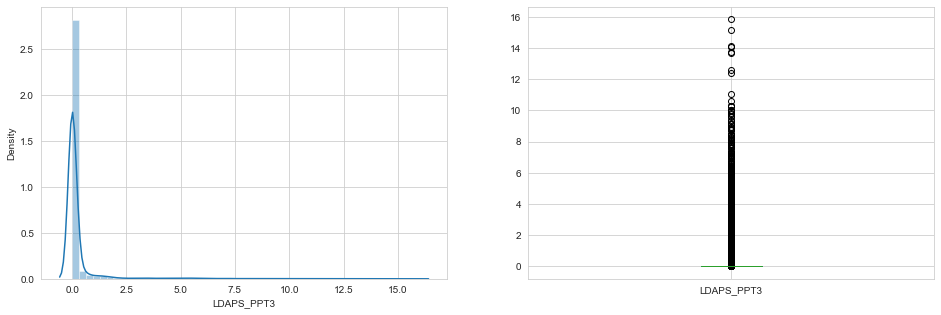

<Figure size 1152x360 with 0 Axes>

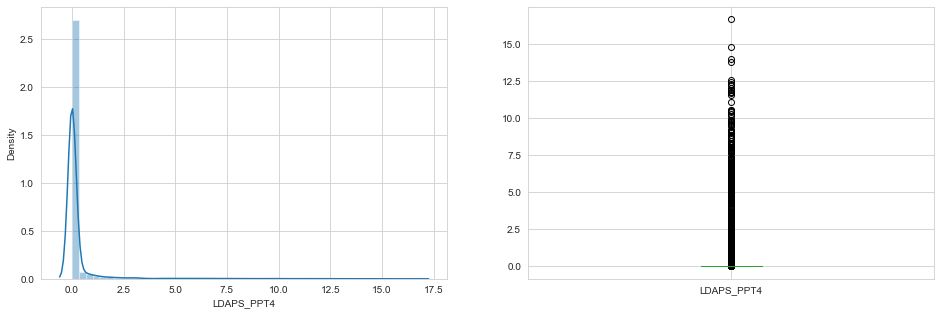

<Figure size 1152x360 with 0 Axes>

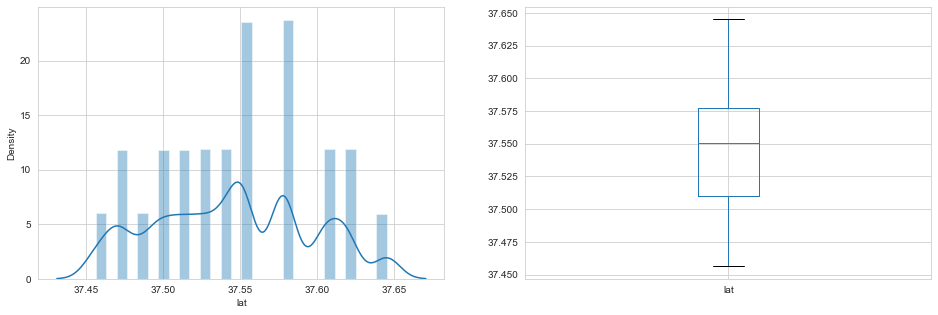

<Figure size 1152x360 with 0 Axes>

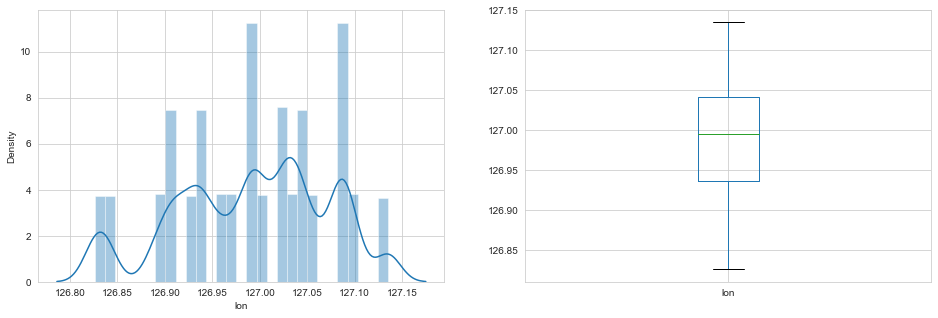

<Figure size 1152x360 with 0 Axes>

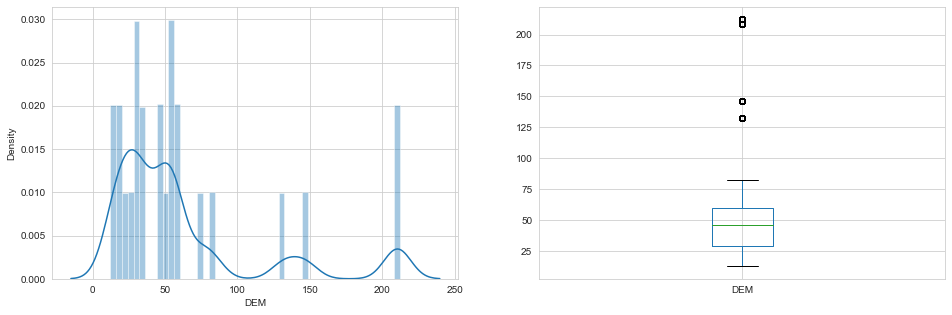

<Figure size 1152x360 with 0 Axes>

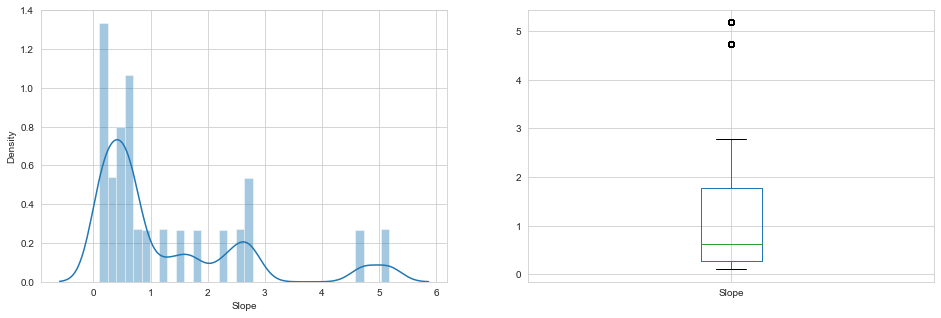

<Figure size 1152x360 with 0 Axes>

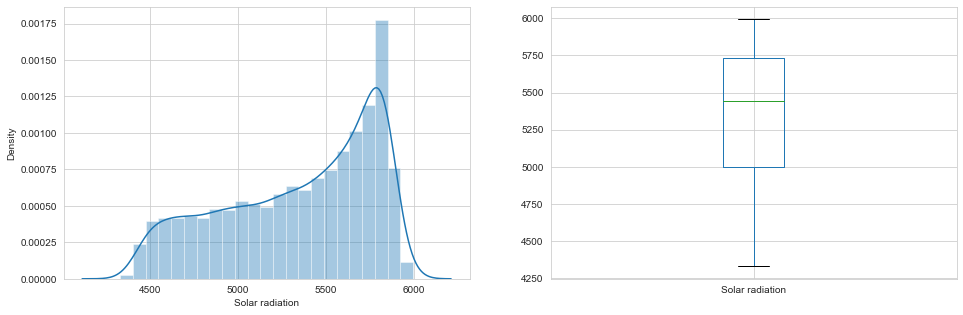

<Figure size 1152x360 with 0 Axes>

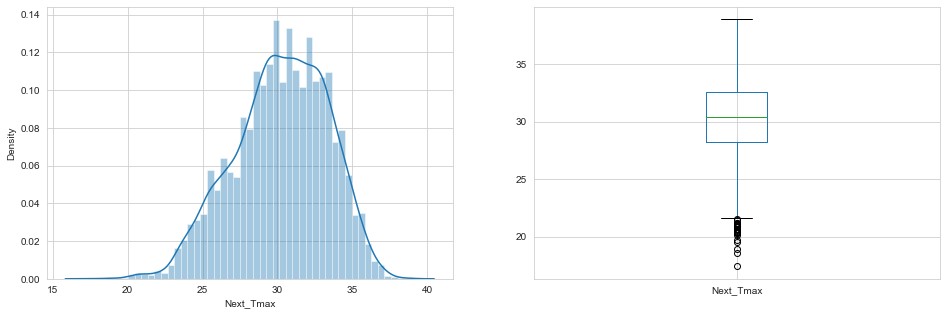

<Figure size 1152x360 with 0 Axes>

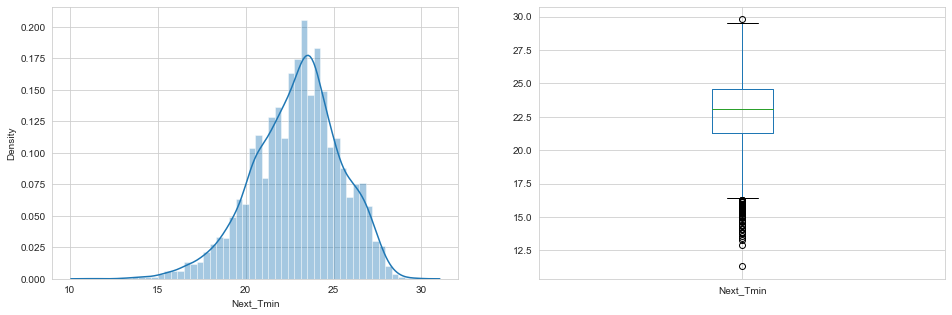

<Figure size 1152x360 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
collist=list(temperature.select_dtypes(['float64']).columns)
for i in range(0,len(collist)):
    plt.subplot(121)
    sns.distplot(temperature[collist[i]])
    plt.subplot(122)
    temperature[collist[i]].plot.box(figsize=(16,5))
    sns.set_style("whitegrid")
    plt.figure(figsize = (16,5))
    plt.show()

LDAPS_RHmax,LDAPS_Tmin_lapse and Solar radiation are right skewed.

LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM and Slope are left Skewed

Too many columns have outliers

# Bi-variate Analysis

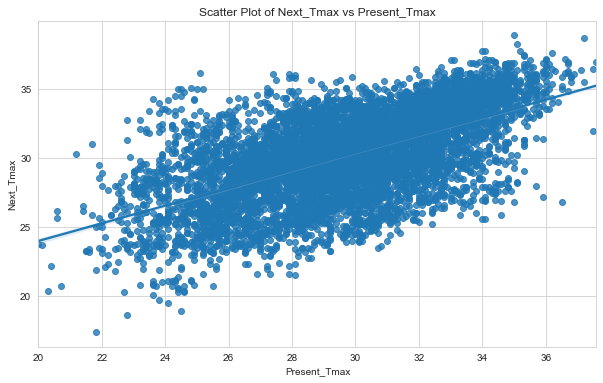

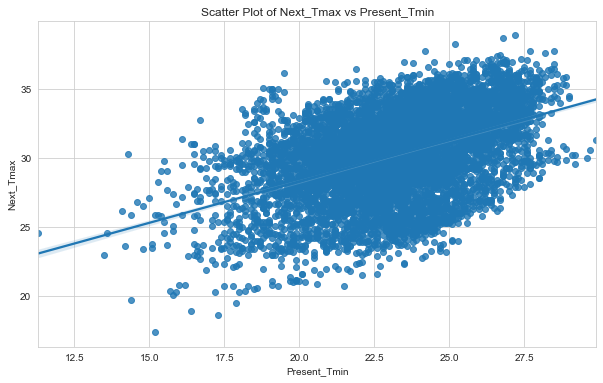

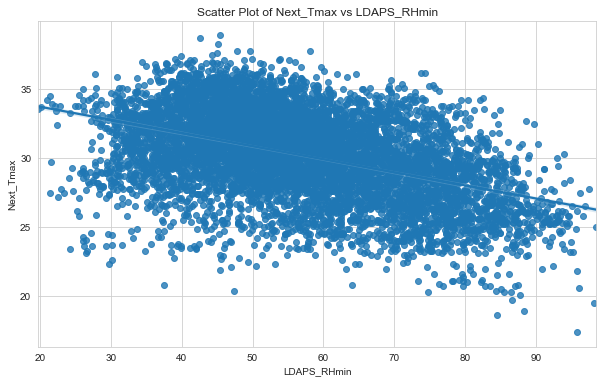

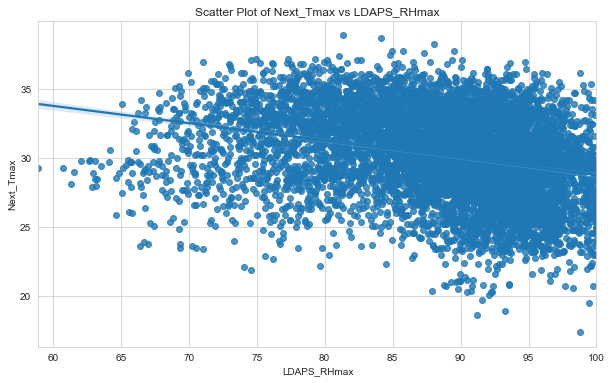

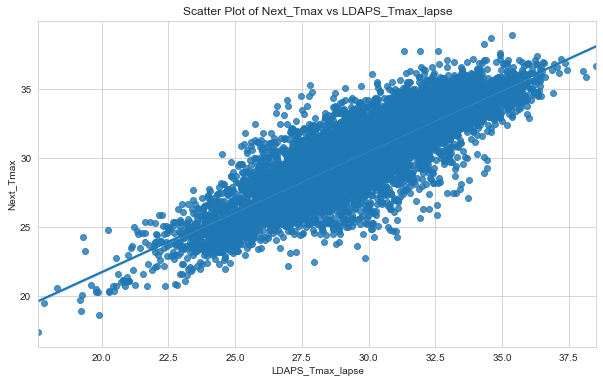

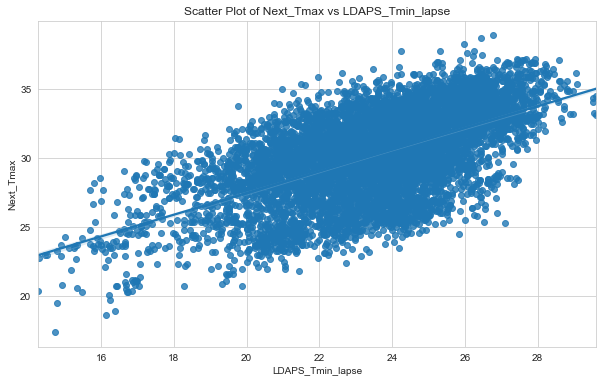

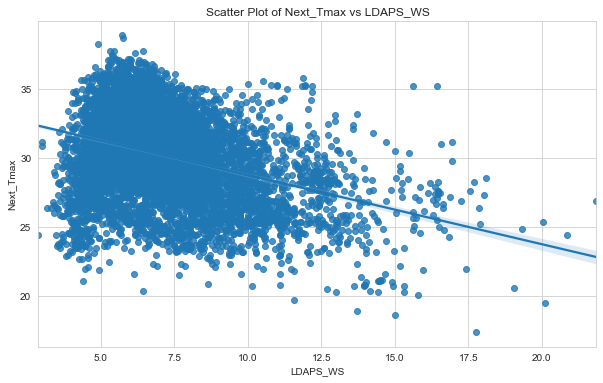

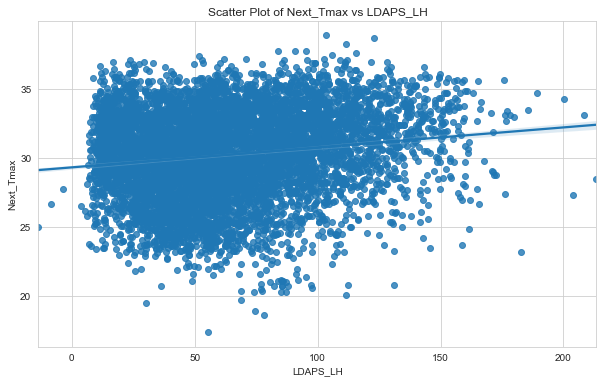

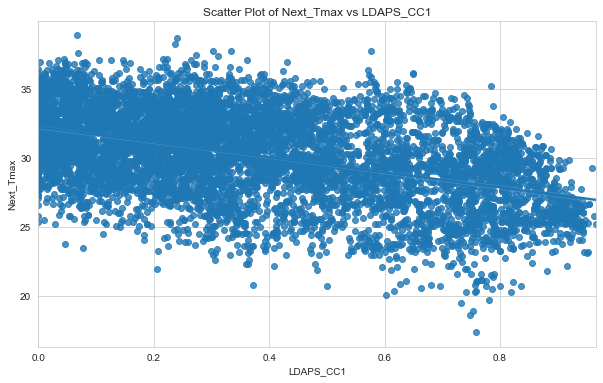

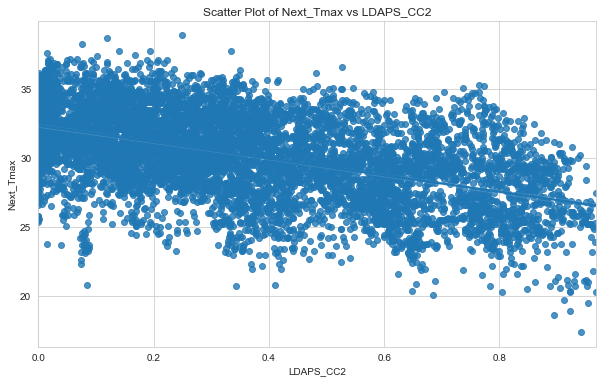

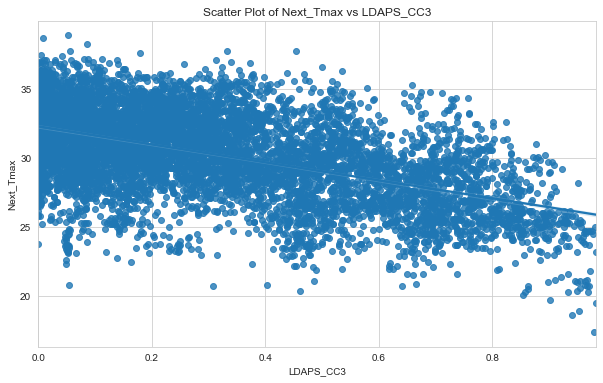

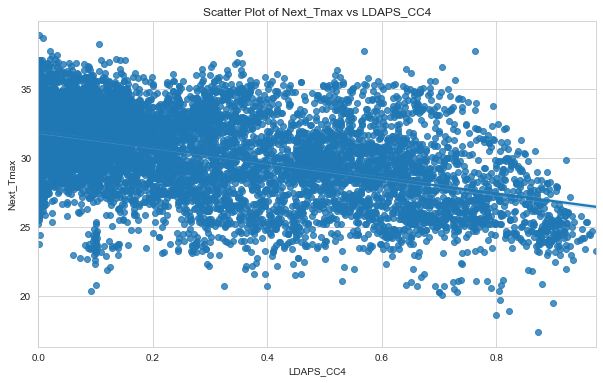

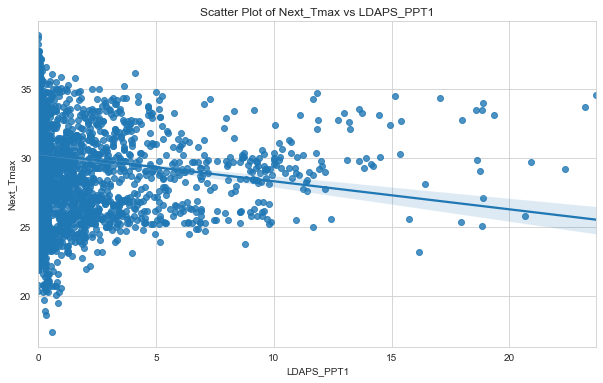

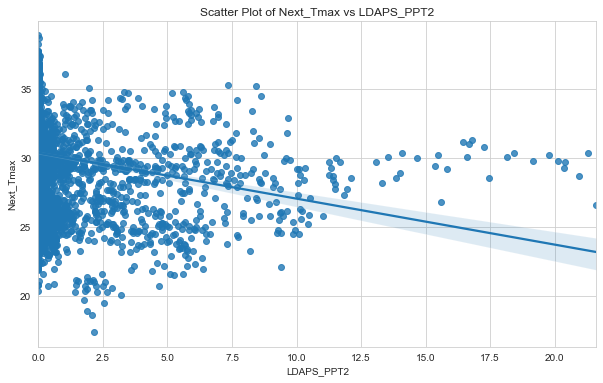

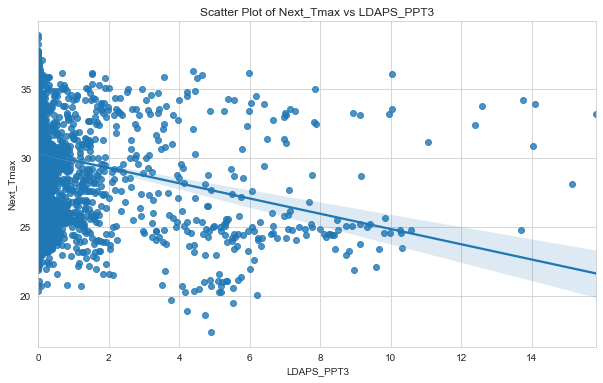

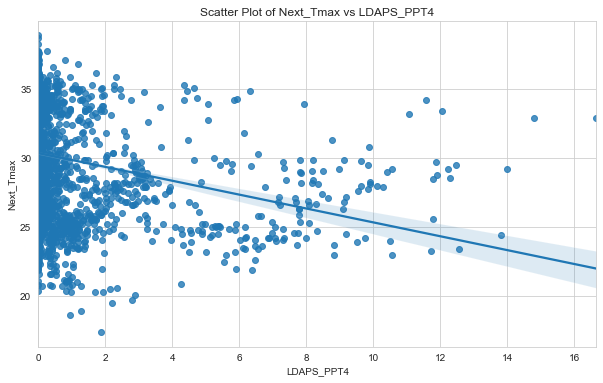

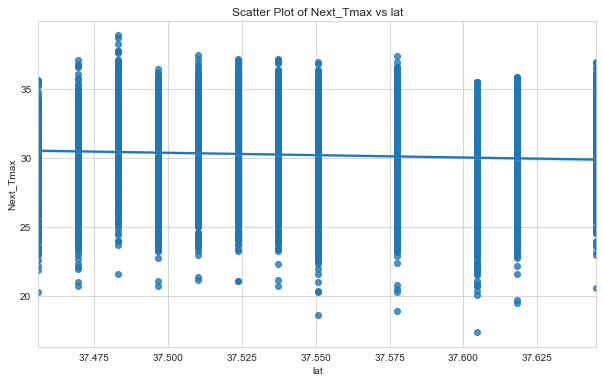

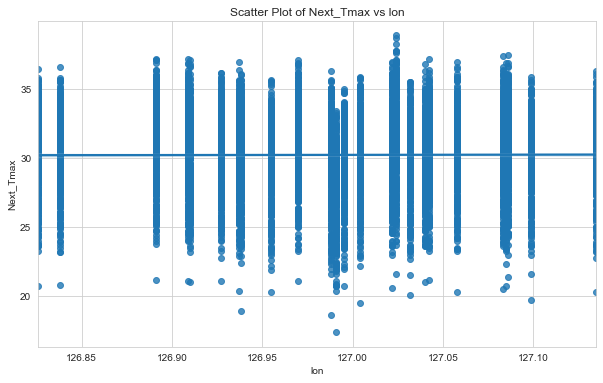

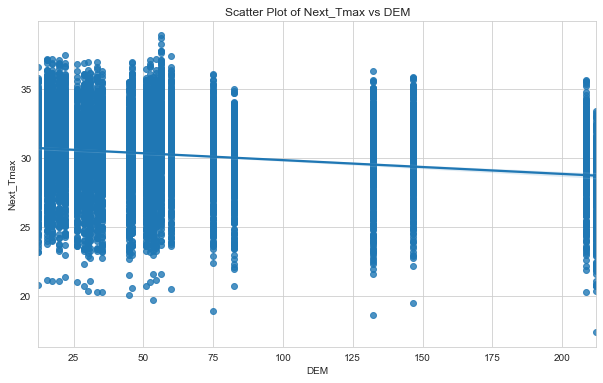

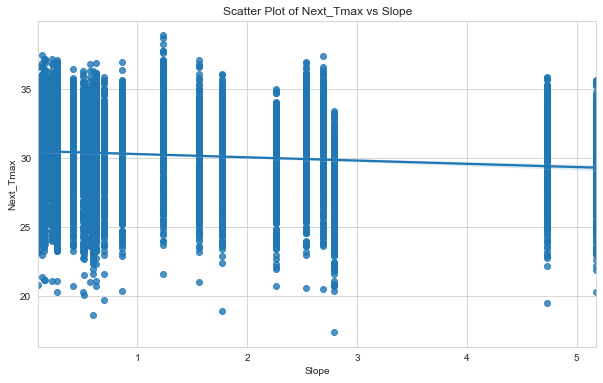

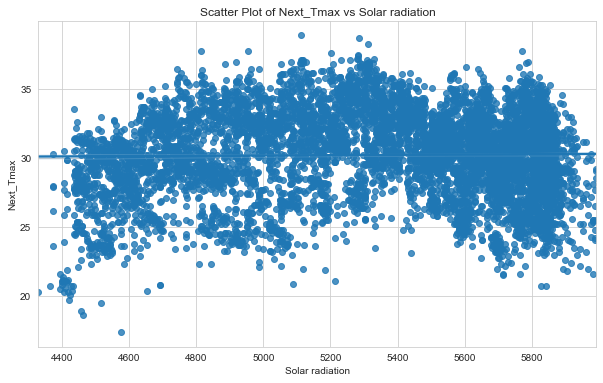

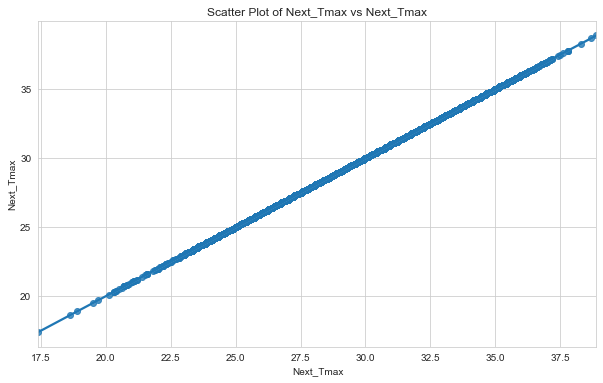

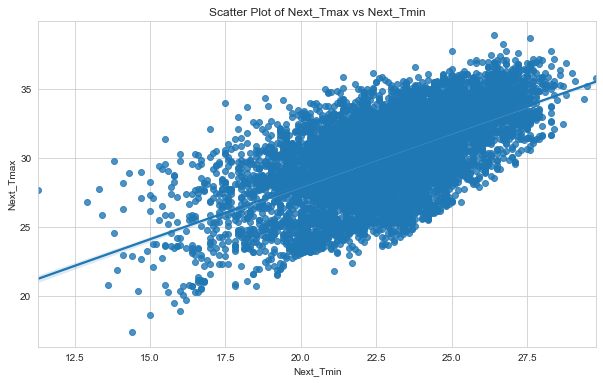

In [11]:
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(temperature[collist[i]], temperature['Next_Tmax'])
    plt.title('Scatter Plot of Next_Tmax vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('Next_Tmax')
    plt.show()

LDAPS_Tmax_lapse, Next_Tmin, Present_Tmax, LDAPS_Tmin_lapse and Present_Tmin have good positive corelation with Next_Tmax.

LDAPS_RHmin, LDAPS_CC4, LDAPS_CC1, LDAPS_CC2 and LDAPS_CC3 have good negative corelation with Next_Tmax.

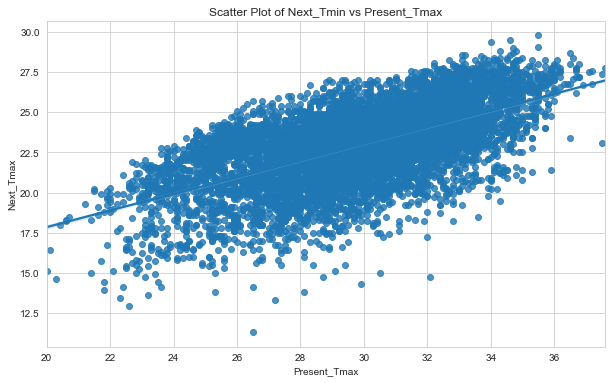

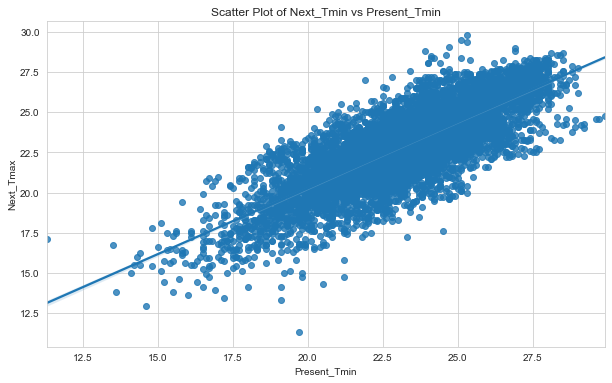

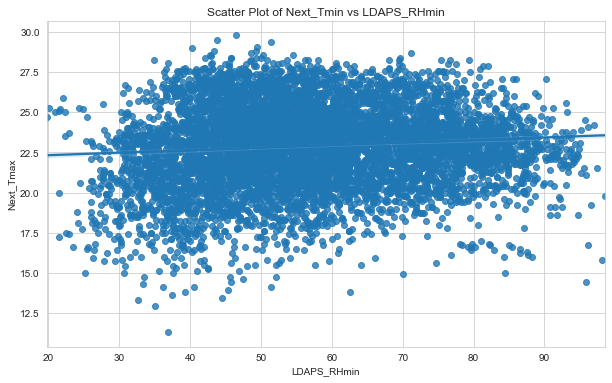

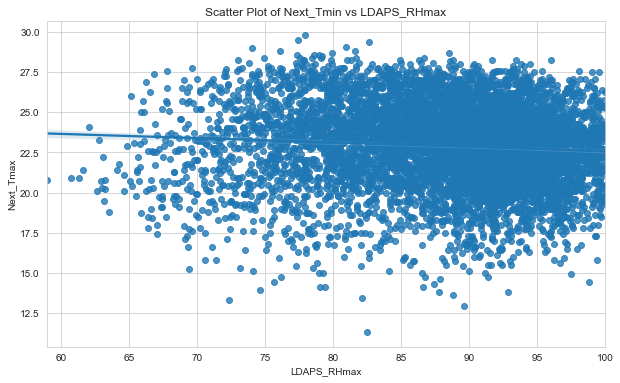

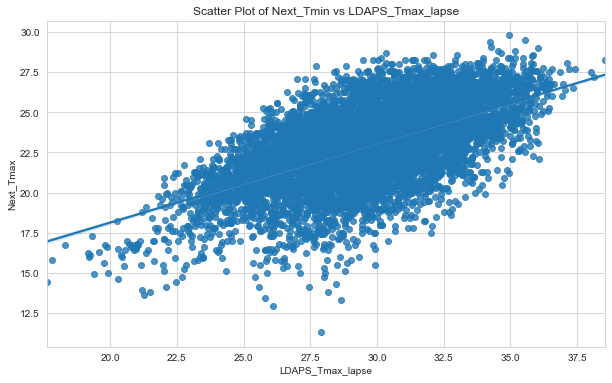

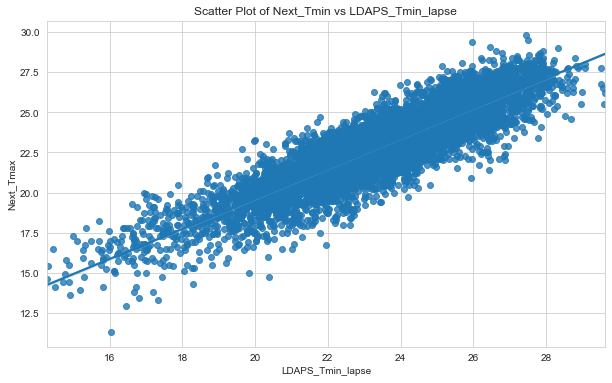

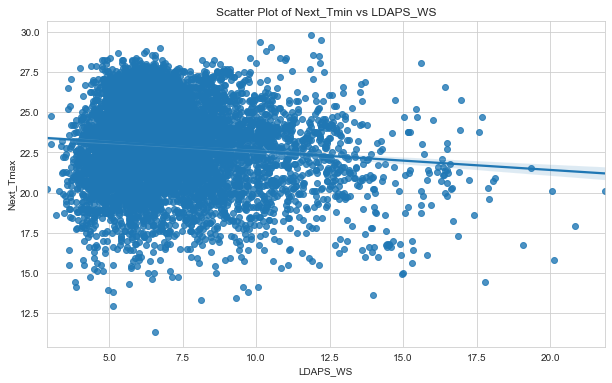

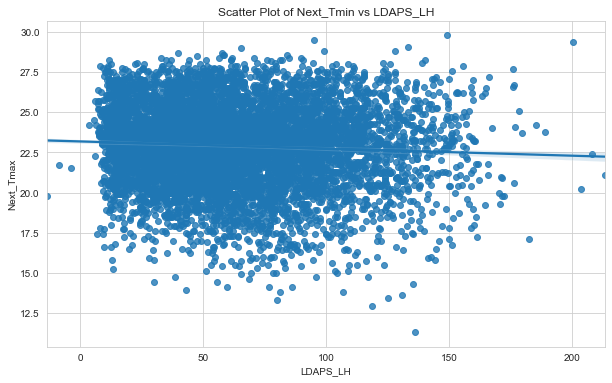

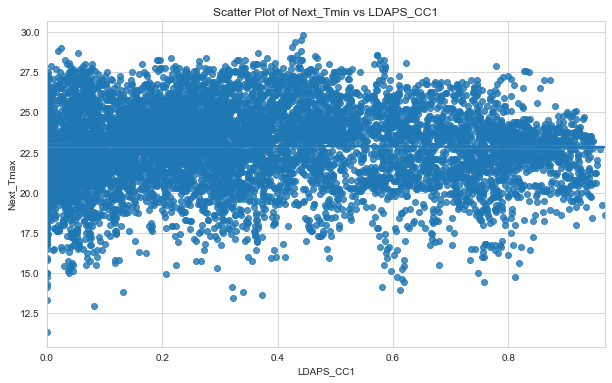

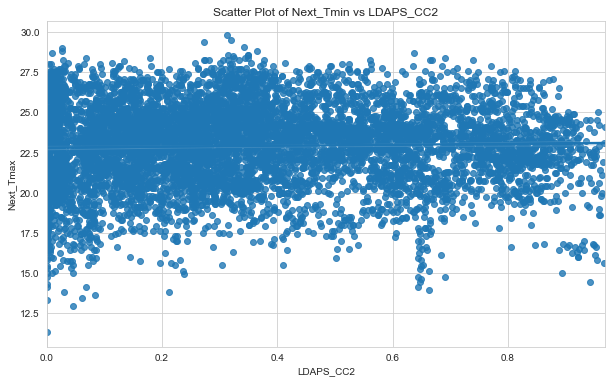

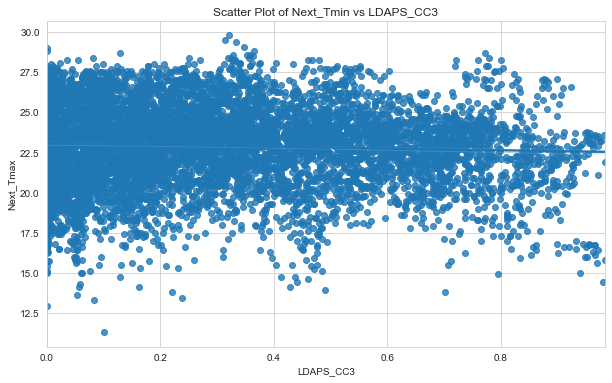

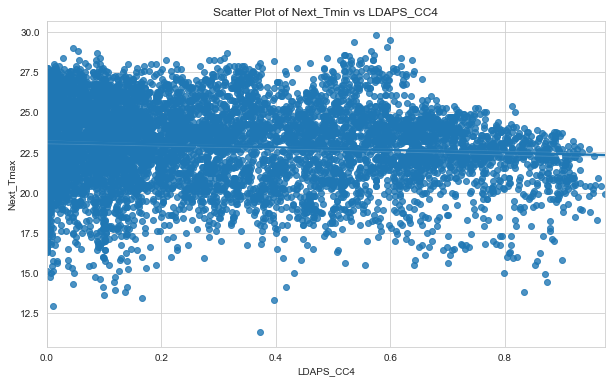

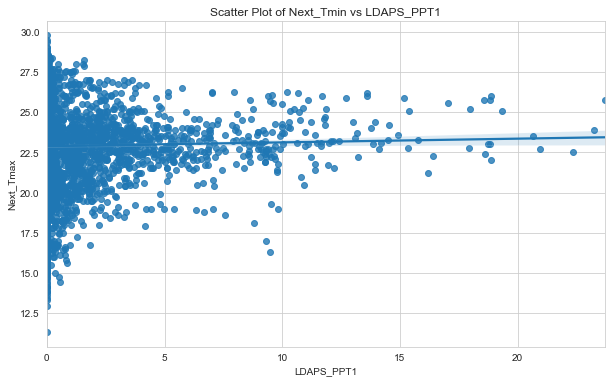

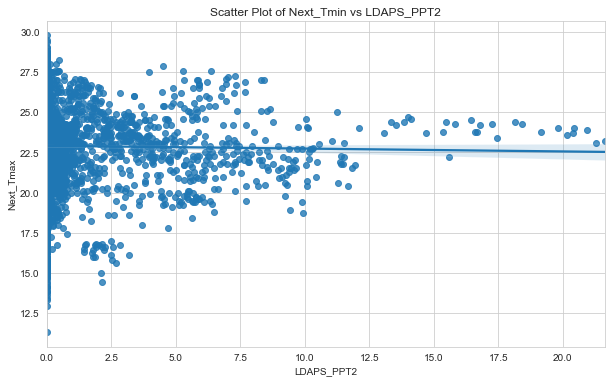

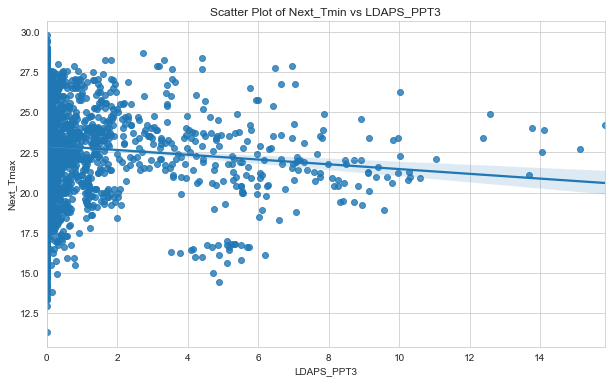

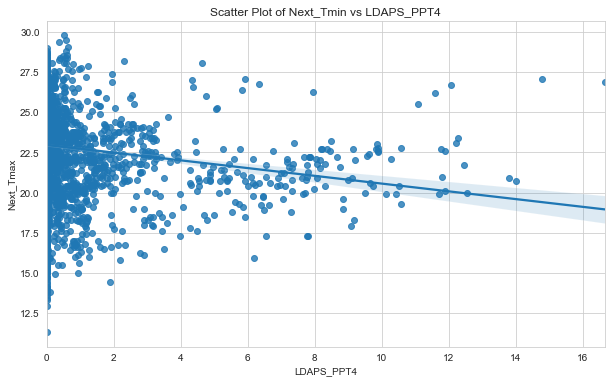

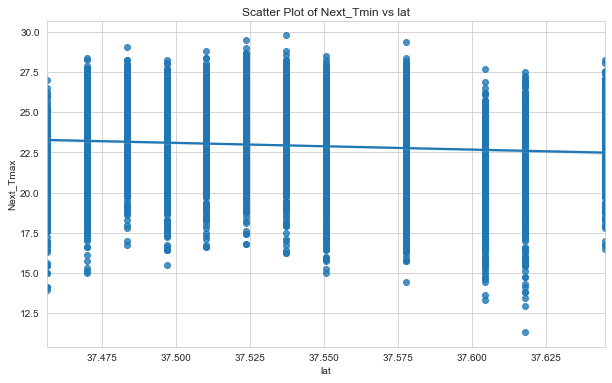

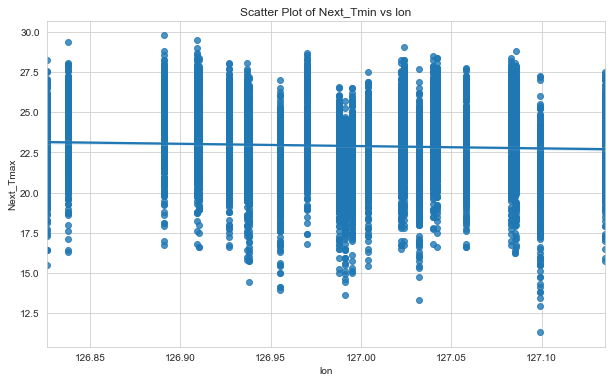

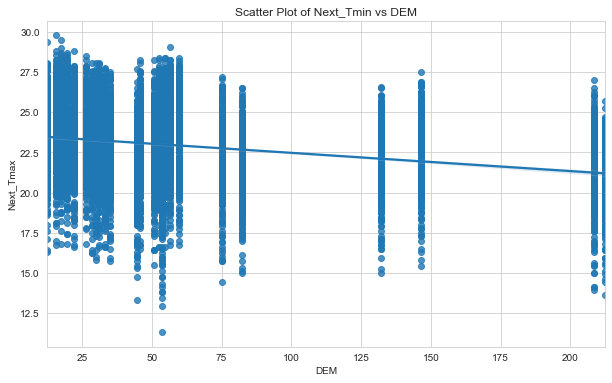

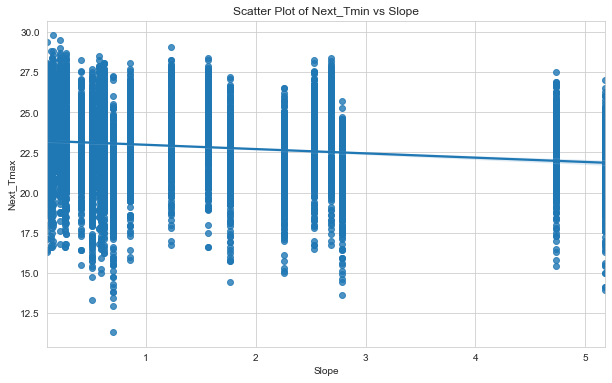

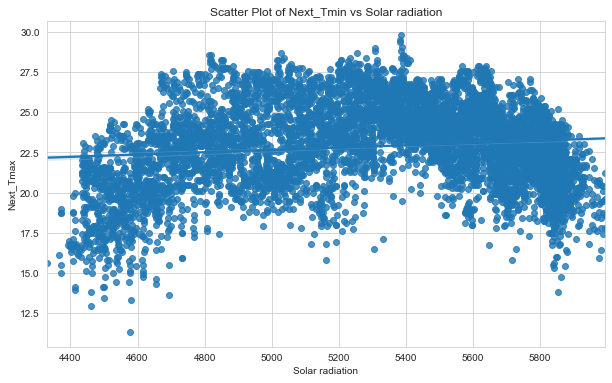

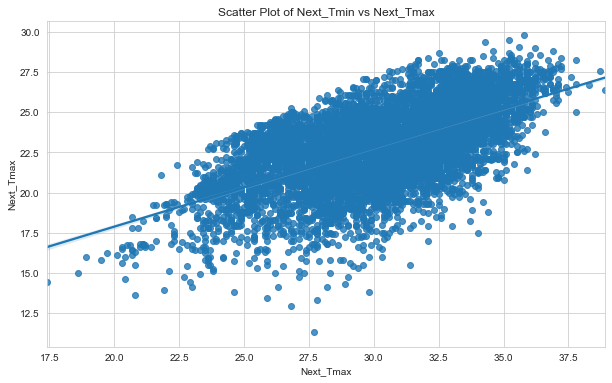

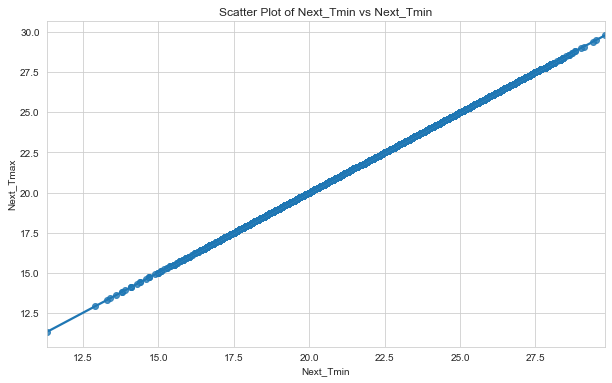

In [12]:
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(temperature[collist[i]], temperature['Next_Tmin'])
    plt.title('Scatter Plot of Next_Tmin vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('Next_Tmax')
    plt.show()

LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax and LDAPS_Tmax_lapse have good positive corelation with Next_Tmin

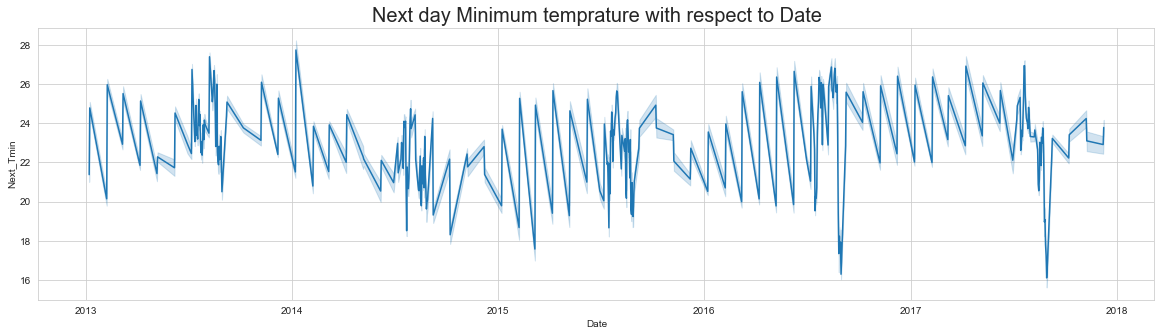

In [13]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmin",  data=temperature)
plt.title("Next day Minimum temprature with respect to Date", fontsize = 20)
plt.show()

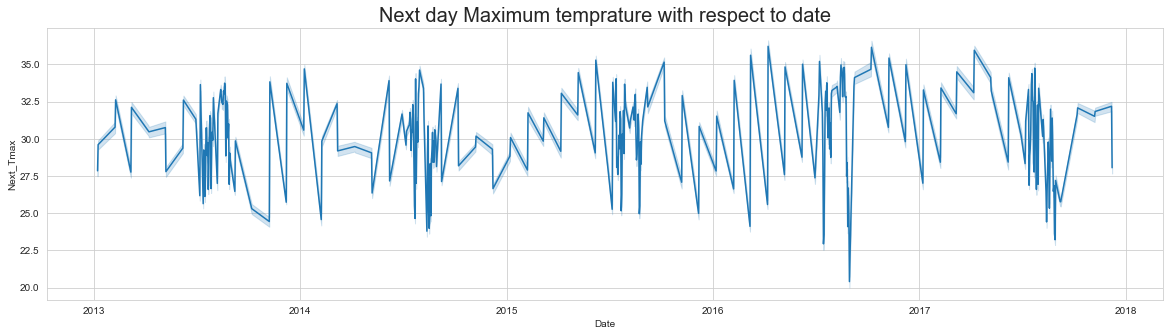

In [14]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature)
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

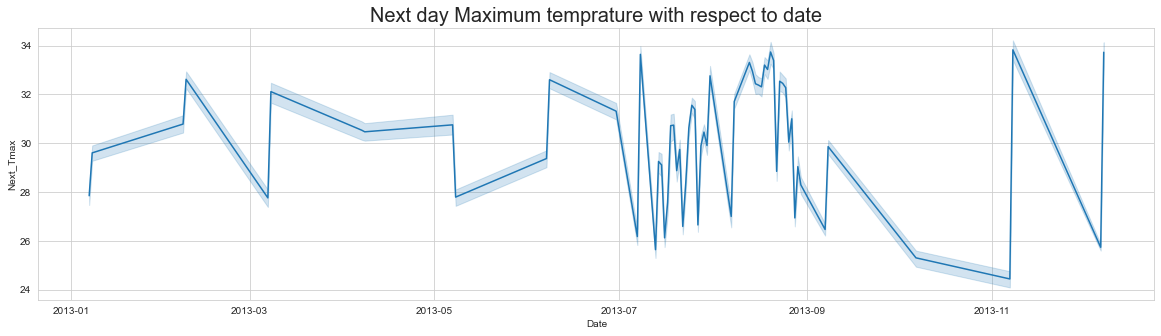

In [15]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature.iloc[:1500])
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

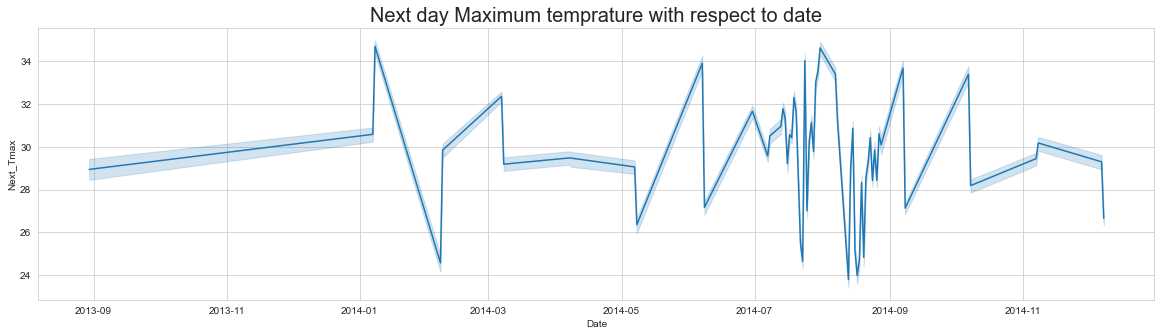

In [16]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature.iloc[1501:3000])
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

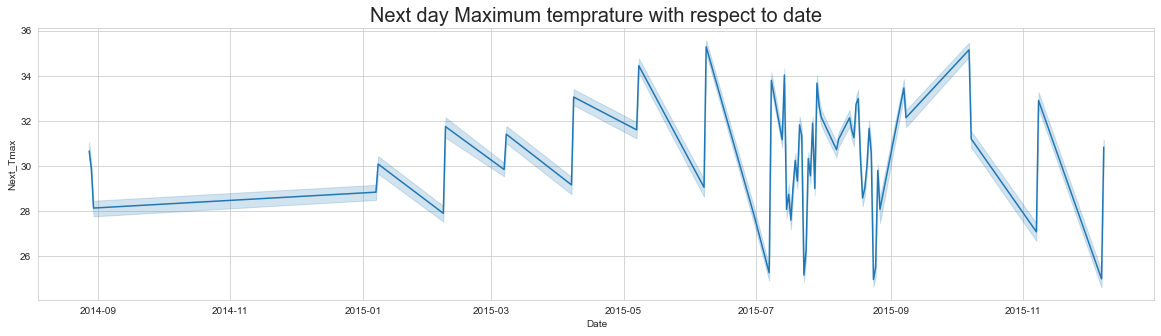

In [17]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature.iloc[3001:4500])
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

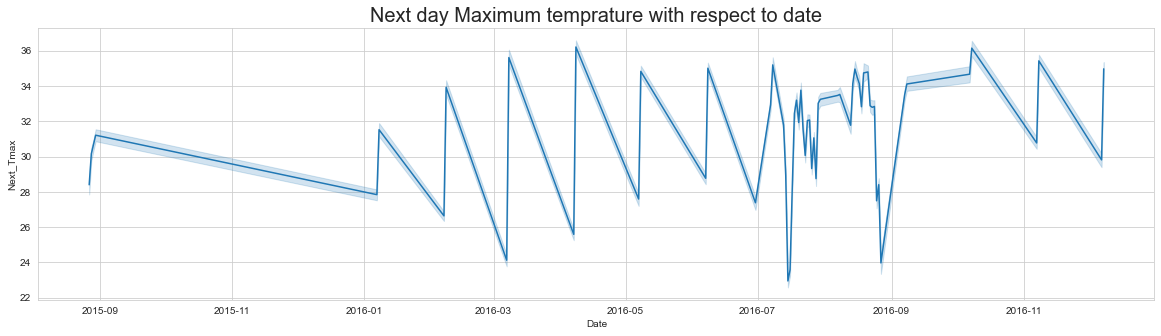

In [18]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature.iloc[4501:6000])
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

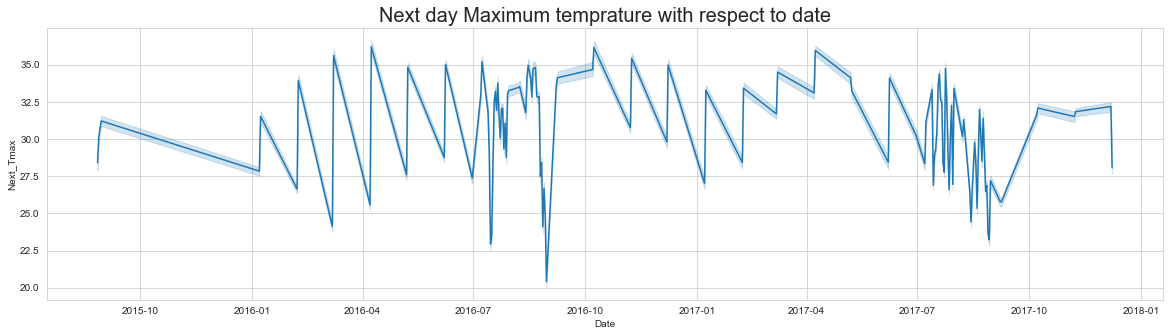

In [19]:
temperature['Date'] = pd.to_datetime(temperature['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Next_Tmax",  data=temperature.iloc[4501:])
plt.title("Next day Maximum temprature with respect to date", fontsize = 20)
plt.show()

# Multi-Variate Analysis

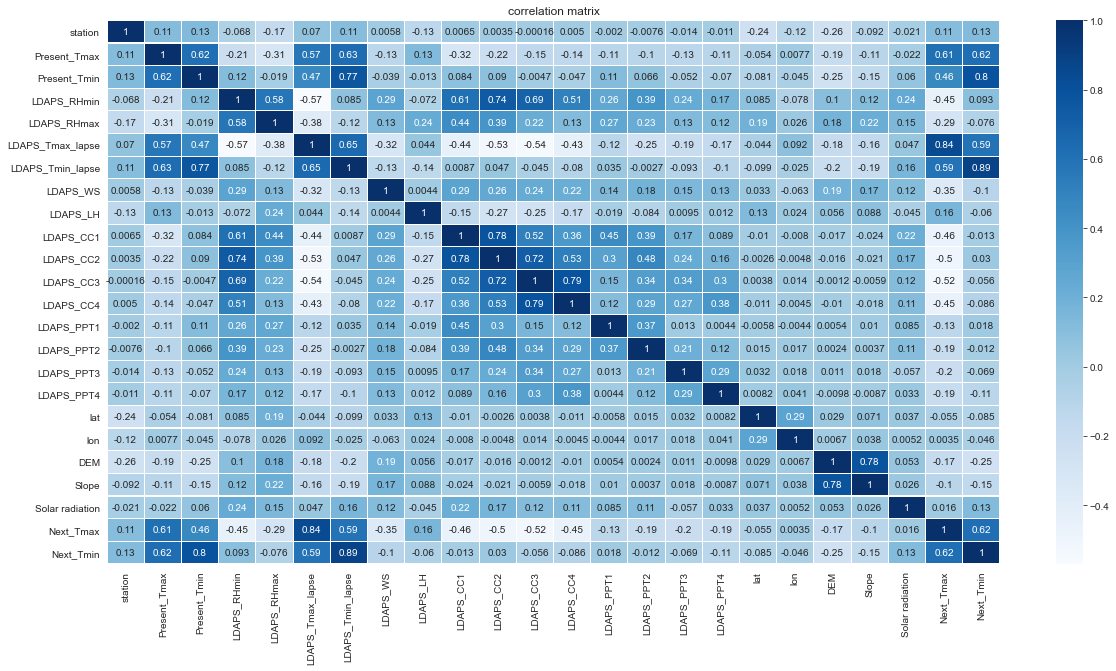

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=temperature.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, Next_Tmin and LDAPS_Tmin_lapse have good positive corelation with Next_Tmax.

LDAPS_RHmin, LDAPS_CC4, LDAPS_CC1, LDAPS_CC2 and LDAPS_CC3 have good negative corelation with Next_Tmax.

LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax and LDAPS_Tmax_lapse have good positive corelation with Next_Tmin

In [21]:
temperature.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000  
mean     61.918136     1.259755      5343.724208    30.241526    22.910820  
std      54.323529     1.372748       429.782561     3.111807     2.482256  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      5001.485717    28.200000    21.300000  
50%      45.716000     0.618000      5441.987305    30.400000    23.100000  
75%      59.832400     1.767800      5729.485840    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000

LDAPS_RHmax,LDAPS_Tmin_lapse, Solar radiation, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM and Slope have skewness becuase their mean and std have too much difference.

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 have too many outlier because their 75% and max value have too much difference.

In [22]:
#Changing Date column from object to int for better prediction

import datetime as dt
temperature['Date'] = pd.to_datetime(temperature['Date'])
temperature['Date'] = temperature['Date'].map(dt.datetime.toordinal)
temperature.head() #Checking top 5 rows of dataset

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [23]:
temperature.dtypes

station             float64
Date                  int64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Removing Skewness and Outliers

In [24]:
#Checking the skewness of the data
temperature.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [25]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in temperature.columns:
    if abs(temperature.loc[:,i].skew())>0.5:
        temperature.loc[:,i]=PT.fit_transform(temperature.loc[:,i].values.reshape(-1,1))

In [26]:
#Removing outliers of the data

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(temperature))
print(np.where(z>3))

(array([1751, 2091, 2154, 2316, 2413, 2425, 2591, 2599, 2633, 2699, 2700,
       2708, 2733, 3123, 3141, 3147, 3148, 3148, 3166, 3172, 3173, 3223,
       3435, 3437, 3481, 3522, 4281, 4506, 4531, 4656, 4708, 4964, 4989,
       4989, 5014, 5379, 5675, 5949, 5959, 5967, 5972, 5973, 5982, 5983,
       5991, 5997, 5998, 6007, 6007, 6008, 6016, 6023, 6032, 6032, 6033,
       6035, 6041, 6048, 6048, 6050, 6051, 6057, 6057, 6057, 6057, 6058,
       6058, 6058, 6059, 6059, 6060, 6060, 6061, 6061, 6062, 6063, 6063,
       6065, 6065, 6066, 6066, 6066, 6067, 6068, 6068, 6068, 6069, 6069,
       6071, 6071, 6072, 6072, 6073, 6073, 6073, 6074, 6075, 6075, 6076,
       6076, 6077, 6117, 6140, 6957, 6970, 6971, 6979, 6980, 6981, 7450,
       7457, 7474, 7481, 7506, 7515, 7515, 7539, 7539, 7539, 7539, 7539,
       7540, 7547, 7549, 7553, 7554, 7556, 7557, 7557, 7563, 7563, 7563,
       7564, 7564, 7571, 7572, 7572, 7574, 7578, 7579, 7579, 7581, 7582],
      dtype=int64), array([ 9,  8,  8,  9,  8,  8

In [27]:
#checking the shape of the data

df=temperature[(z<3).all(axis = 1)]

print(temperature.shape)
print(df.shape)

(7588, 25)
(7482, 25)


In [28]:
#checking for how much data we lost

loss_percent=(7588-7482)/7588*100
print(loss_percent)

1.39694254085398


We lost 1.4% of our data, which is not bad.

# Seperate independent variable and target variable

In [29]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

# Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0  0.000000  0.096882      0.457317      0.384058     0.498592     0.593474   
1  0.041667  0.096882      0.652439      0.398551     0.420911     0.574555   
2  0.083333  0.096882      0.634146      0.521739     0.374593     0.366159   
3  0.125000  0.096882      0.658537      0.528986     0.498386     0.820267   
4  0.166667  0.096882      0.621951      0.420290     0.471607     0.558291   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0          0.419322          0.438552  0.519396  0.509733   0.241862   
1          0.521803          0.517118  0.398230  0.412645   0.233137   
2          0.535683          0.560148  0.450614  0.192329   0.216426   
3          0.513378          0.462280  0.392974  0.490055   0.223692   
4          0.479304          0.474421  0.403582  0.691678   0.156529   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.210559   0.297693   0.266481         0.0         0.0         0.0   
1   0.260000   0.294186   0.260897         0.0         0.0         0.0   
2   0.265884   0.360932   0.285701         0.0         0.0         0.0   
3   0.233388   0.296855   0.272231         0.0         0.0         0.0   
4   0.258165   0.323963   0.331553         0.0         0.0         0.0   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  
0         0.0  0.786017  0.533981  1.000000  0.866798         1.000000  
1         0.0  0.786017  0.666667  0.534337  0.338791         0.876828  
2         0.0  0.643008  0.750809  0.424247  0.163808         0.871331  
3         0.0  1.000000  0.634304  0.541902  0.842260         0.865063  
4         0.0  0.500530  1.000000  0.443653  0.333702         0.867521

After Scaling our data is in 0 to 1 range. It's now very convenient to train and test our data

# Finding Best Random State

# Next_Tmax

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.786541785088656  on Random_state  225


In [32]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [33]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [34]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y1_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.786541785088656
Mean Absolute Error:      1.0767490227068788
Mean Squared error:       2.010454608813723
Root Mean Squared Error:  1.4179050069781556
[0.59381378 0.69539358 0.62136392 0.64180942 0.72098866 0.73331502
 0.77371424 0.64118124]
cross validation score:   0.677697483592262
Difference between R2 score and cross validatio score is -  0.10884430149639401
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.91046302514817

Ridge have very low Cross validation difference with Accuracy Score i.e. 10.80%, So we'll learn our model with Ridge

# Hyper Parameter Tuning

In [35]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 17, 'solver': 'sag'}

In [36]:
clf_pred=clf.best_estimator_.predict(x_test)

In [37]:
r2_score(y1_test, clf_pred)

0.7864940662296307

Our model learnt almost 78.65% for Next_Tmax

# Saving the model

In [38]:
import joblib
joblib.dump(clf.best_estimator_,"PJ8_Temperature_Tmax.obj")
RF_from_joblib=joblib.load('PJ8_Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([28.81968481, 29.5082694 , 26.44732951, ..., 30.27594155,
       31.84283474, 31.90465005])

In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

0          1         2          3          4          5     \
Predicted  28.819685  29.508269  26.44733  30.137326  35.027655  24.975104   
Original   29.100000  29.900000  26.10000  31.200000  34.300000  23.100000   

                6          7          8          9          10         11    \
Predicted  27.614483  29.768659  32.021901  34.152955  30.242521  27.516523   
Original   24.700000  27.700000  31.900000  35.100000  30.200000  27.100000   

               12         13         14         15         16         17    \
Predicted  29.32807  27.128789  35.187991  27.779797  28.137429  34.848494   
Original   29.10000  26.000000  34.700000  27.100000  29.000000  33.300000   

                18        19       20         21        22         23    \
Predicted  31.378943  23.22941  28.5982  27.397149  30.23469  33.788195   
Original   31.700000  21.60000  27.3000  25.300000  29.50000  34.000000   

                24         25         26         27         28         29    \
Predicted  32.887466  25.295168  33.773396  33.610744  34.639248  26.750884   
Original   33.200000  27.200000  35.400000  35.500000  35.800000  26.800000   

                30         31         32         33         34         35    \
Predicted  28.281449  24.194732  25.347454  30.747636  30.401735  24.779448   
Original   27.500000  22.000000  24.700000  31.200000  32.200000  23.200000   

                36         37         38         39         40         41    \
Predicted  25.234543  36.336439  35.274903  31.789915  28.902744  30.572628   
Original   23.900000  36.800000  35.200000  27.400000  29.900000  28.500000   

               42         43       44         45         46         47    \
Predicted  28.75256  27.422083  29.2134  32.307887  27.775776  29.311772   
Original   29.30000  28.300000  27.8000  33.600000  27.900000  28.000000   

               48         49         50         51         52         53    \
Predicted  32.31153  31.181662  29.078618  24.337795  33.995169  31.917279   
Original   31.20000  31.400000  30.000000  24.600000  34.900000  30.600000   

                54         55         56         57         58         59    \
Predicted  32.234149  27.990586  30.918347  25.143382  32.433222  31.213161   
Original   32.800000  27.000000  29.600000  24.100000  33.000000  30.400000   

              60         61         62         63         64         65    \
Predicted  28.6799  30.995868  32.422034  31.421625  28.490078  25.931585   
Original   27.5000  28.900000  32.100000  31.800000  27.300000  25.900000   

                66         67        68         69        70         71    \
Predicted  26.155457  30.989659  33.47709  29.521188  27.21302  31.139936   
Original   25.100000  30.200000  34.10000  28.900000  27.30000  33.200000   

                72         73         74         75         76         77    \
Predicted  29.415089  29.789164  21.918411  32.807569  35.845228  26.638296   
Original   28.500000  28.300000  21.100000  32.000000  34.700000  26.300000   

               78         79         80         81         82         83    \
Predicted  32.49639  32.974872  28.297461  31.033715  33.846865  31.641574   
Original   32.60000  33.600000  30.500000  33.300000  34.500000  30.900000   

                84         85         86         87         88         89    \
Predicted  32.432125  30.531125  32.661532  27.368909  26.745923  23.621808   
Original   31.600000  30.800000  33.200000  31.300000  28.500000  22.100000   

                90         91         92         93         94         95    \
Predicted  31.940981  29.183505  29.456405  28.986213  30.423977  29.199066   
Original   33.600000  26.300000  27.500000  28.200000  31.200000  25.400000   

                96         97         98         99         100        101   \
Predicted  31.675646  27.829574  25.582079  28.895173  28.776303  27.870318   
Original   33.000000  29.000000  26.100000  29.800000  27.900000  26.600000   

               

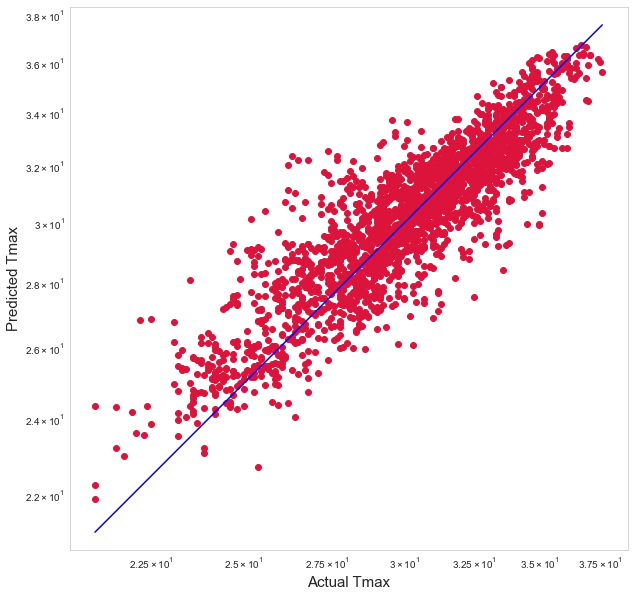

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

# Next_Tmin

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8430122371267958  on Random_state  68


In [42]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.30,random_state=maxRS)

In [43]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.8430122371267958
Mean Absolute Error:      0.7547642229303699
Mean Squared error:       0.9180938268656407
Root Mean Squared Error:  0.958172127994569
[0.51198221 0.83772098 0.63977498 0.75502167 0.80512725 0.80896123
 0.85169085 0.8702346 ]
cross validation score:   0.7600642203105246
Difference between R2 score and cross validatio score is -  0.08294801681627129
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.909289734458

Ridge have very low Cross validation difference with Accuracy Score i.e. 8.25%, So we'll learn our model with Ridge

# Hyper Parameter Tuning

# import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :range(0,20),
              'random_state':range(0,20),
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=8)
clf.fit(x_train, y2_train)
clf.best_params_  #Best parameters

In [45]:
clf_pred=clf.best_estimator_.predict(x_test)

In [46]:
r2_score(y2_test, clf_pred)

0.8430185062978137

Our model learnt almost 84.30% for Next_Tmin

# Saving the model

In [47]:
import joblib
joblib.dump(clf.best_estimator_,"PJ8_Temperature_Tmin.obj")
RF_from_joblib=joblib.load('PJ8_Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([21.63530716, 20.4627925 , 18.85273105, ..., 26.78938256,
       22.37652376, 21.9740071 ])

In [48]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

0          1          2          3          4          5     \
Predicted  21.635307  20.462793  18.852731  27.533969  22.606954  21.702191   
Original   23.400000  20.100000  20.400000  27.500000  20.700000  20.200000   

                6          7          8          9          10         11    \
Predicted  19.624729  24.327143  21.640635  23.572386  25.646703  23.998926   
Original   19.800000  24.700000  19.000000  24.200000  26.000000  23.500000   

                12         13         14         15      16         17    \
Predicted  21.602954  24.379237  24.886512  23.088567  21.794  23.937064   
Original   20.800000  24.100000  26.200000  22.900000  22.600  24.300000   

                18         19         20         21         22         23    \
Predicted  24.320011  26.403436  20.652931  21.158024  21.427968  23.477779   
Original   25.300000  26.800000  21.500000  21.100000  22.000000  22.100000   

                24         25         26         27         28         29    \
Predicted  26.578192  18.550263  20.766622  25.247828  22.174006  19.931993   
Original   26.200000  20.500000  18.500000  23.900000  22.900000  19.800000   

                30         31         32         33         34         35    \
Predicted  25.164507  20.208609  24.992391  26.665489  24.774694  20.842783   
Original   24.500000  20.800000  23.800000  27.300000  25.600000  21.800000   

                36         37         38         39        40         41    \
Predicted  22.099647  21.839891  23.266909  25.025209  22.20941  20.795305   
Original   23.600000  21.800000  23.900000  24.800000  22.40000  22.800000   

                42         43         44         45         46         47    \
Predicted  21.397189  22.489211  25.350548  22.278089  21.595543  20.770937   
Original   21.300000  23.200000  26.200000  20.400000  22.000000  21.100000   

                48         49         50         51         52         53    \
Predicted  20.615951  22.465199  25.755053  20.247338  23.246515  19.468975   
Original   21.900000  23.200000  26.200000  20.000000  23.600000  16.600000   

                54         55         56         57         58         59    \
Predicted  19.139447  20.755149  24.023896  19.161003  22.687139  22.749492   
Original   15.800000  21.500000  23.700000  18.600000  23.300000  22.500000   

                60        61         62         63         64         65    \
Predicted  22.754151  27.37829  23.959564  26.229754  24.765377  19.675648   
Original   22.200000  26.70000  24.000000  26.800000  23.300000  19.200000   

               66         67         68         69         70         71    \
Predicted  21.81103  22.424375  25.377719  24.687073  22.717166  18.904395   
Original   20.60000  23.900000  25.800000  23.800000  22.800000  18.900000   

                72         73         74         75         76         77    \
Predicted  25.900999  25.187606  20.181294  18.928359  20.024376  23.299196   
Original   25.700000  25.700000  19.400000  19.200000  19.400000  24.800000   

               78         79         80         81         82        83    \
Predicted  23.87896  18.762363  19.013723  26.491878  24.860764  25.40539   
Original   24.30000  19.500000  20.500000  25.700000  23.700000  26.20000   

                84         85         86         87         88         89    \
Predicted  21.807171  23.895028  22.984141  22.175449  23.050206  22.061755   
Original   22.200000  22.400000  24.700000  23.500000  22.700000  23.100000   

                90         91         92         93         94         95    \
Predicted  22.009153  23.931661  23.884461  26.051086  25.306175  26.899537   
Original   22.000000  24.600000  23.800000  25.500000  24.900000  26.700000   

                96         97         98         99         100        101   \
Predicted  24.432624  19.724884  23.874186  26.737326  26.045111  21.138315   
Original   24.700000  19.100000  23.800000  25.700000  27.300000  20.40000

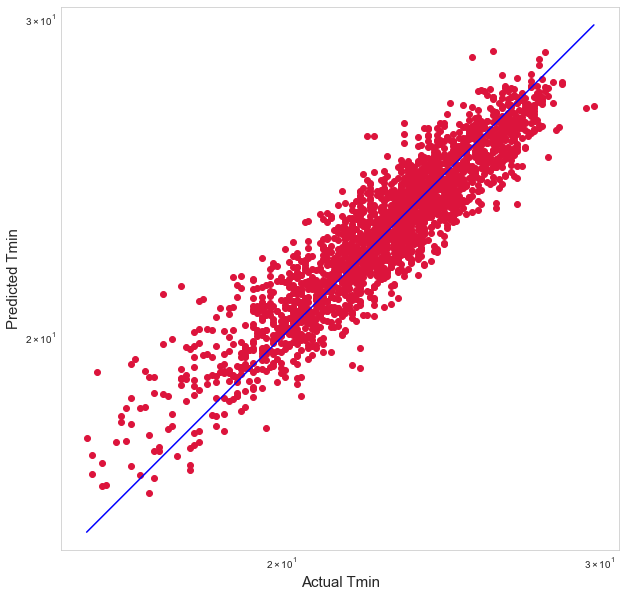

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()